In [1]:
import pandas as pd
import seaborn as sns

# Load datasets
crm_data = pd.read_csv('crm_data.csv')
web_tracking = pd.read_csv('web_tracking.csv')

In [2]:
crm_data.head()

,user_id,lead_status,company,sign_up_date,industry,country
0,137,Converted,Company_0,09-03-2024,Healthcare,US
1,163,Converted,Company_1,01-03-2024,Finance,UK
2,103,Prospect,Company_2,02-03-2024,Healthcare,France
3,163,Lost,Company_3,01-03-2024,SaaS,US
4,171,Lost,Company_4,07-03-2024,Healthcare,Germany


In [3]:
web_tracking.head()

,user_id,session_id,timestamp,page,time_spent_sec,utm_source,utm_medium,device_type,Unnamed: 8
0,151,s000,07-03-2024 12:55,/pricing,54,newsletter,referral,mobile,NaN
1,192,s001,05-03-2024 14:21,/landing,71,linkedin,email,desktop,NaN
2,114,s002,01-03-2024 14:25,/contact,143,facebook,cpc,desktop,NaN
3,171,s003,06-03-2024 16:56,/contact,293,newsletter,email,desktop,NaN
4,160,s004,01-03-2024 21:41,/contact,37,linkedin,organic,tablet,NaN


In [4]:
crm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       60 non-null     int64 
 1   lead_status   60 non-null     object
 2   company       60 non-null     object
 3   sign_up_date  60 non-null     object
 4   industry      60 non-null     object
 5   country       60 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.9+ KB


In [5]:
web_tracking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         100 non-null    int64  
 1   session_id      100 non-null    object 
 2   timestamp       100 non-null    object 
 3   page            100 non-null    object 
 4   time_spent_sec  100 non-null    int64  
 5   utm_source      100 non-null    object 
 6   utm_medium      100 non-null    object 
 7   device_type     100 non-null    object 
 8   Unnamed: 8      0 non-null      float64
dtypes: float64(1), int64(2), object(6)
memory usage: 7.2+ KB


In [6]:
# Convert timestamp to datetime
web_tracking['timestamp'] = pd.to_datetime(web_tracking['timestamp'])


In [7]:
web_tracking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         100 non-null    int64         
 1   session_id      100 non-null    object        
 2   timestamp       100 non-null    datetime64[ns]
 3   page            100 non-null    object        
 4   time_spent_sec  100 non-null    int64         
 5   utm_source      100 non-null    object        
 6   utm_medium      100 non-null    object        
 7   device_type     100 non-null    object        
 8   Unnamed: 8      0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 7.2+ KB


In [8]:
web_tracking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         100 non-null    int64         
 1   session_id      100 non-null    object        
 2   timestamp       100 non-null    datetime64[ns]
 3   page            100 non-null    object        
 4   time_spent_sec  100 non-null    int64         
 5   utm_source      100 non-null    object        
 6   utm_medium      100 non-null    object        
 7   device_type     100 non-null    object        
 8   Unnamed: 8      0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 7.2+ KB


#### Take a consistent naming convention for use case

#### Rename some columns according to snake_case or camelCase


### To check for duplicate values as this will be our joining Column

In [11]:
crm_data['user_id'].value_counts().sum()

np.int64(60)

In [12]:
duplicate_ids = crm_data['user_id'].value_counts()[crm_data['user_id'].value_counts() > 1].index

print("Duplicate IDs:")
print(duplicate_ids)


Duplicate IDs:
Index([161, 103, 163, 102, 121, 120, 171, 150, 187, 146], dtype='int64', name='user_id')


In [13]:
duplicate_ids_web_tracking = web_tracking['user_id'].value_counts()[web_tracking['user_id'].value_counts() > 1].index

print("Duplicate IDs:")
print(duplicate_ids_web_tracking)


Duplicate IDs:
Index([161, 159, 101, 120, 152, 103, 114, 123, 199, 102, 171, 174, 187, 163,
       188, 191, 121, 179, 153, 177, 143, 150, 117, 113, 189, 186, 146, 192],
      dtype='int64', name='user_id')


## Changing all the CATEGORICAL VALUES to LOWER CASE() 

In [14]:
# Define a list of columns to trim and lower
columns_to_trim = ['company', 'country', 'industry', 'lead_status']

# Trim and lower the columns
crm_data[columns_to_trim] = crm_data[columns_to_trim].apply(lambda x: x.str.strip().str.lower())

In [15]:
crm_data.head()

,user_id,lead_status,company,sign_up_date,industry,country
0,137,converted,company_0,09-03-2024,healthcare,us
1,163,converted,company_1,01-03-2024,finance,uk
2,103,prospect,company_2,02-03-2024,healthcare,france
3,163,lost,company_3,01-03-2024,saas,us
4,171,lost,company_4,07-03-2024,healthcare,germany


In [61]:
# Define a list of columns to trim and lower
columns_to_trim = ['page', 'utm_source', 'utm_medium', 'device_type']

# Trim and lower the columns
web_tracking[columns_to_trim] = web_tracking[columns_to_trim].apply(lambda x: x.str.strip().str.lower())
web_tracking

,user_id,session_id,timestamp,page,time_spent_sec,utm_source,utm_medium,device_type
0,151,s000,2024-03-07 12:55:00,/pricing,54,newsletter,referral,mobile
1,192,s001,2024-03-05 14:21:00,/landing,71,linkedin,email,desktop
2,114,s002,2024-03-01 14:25:00,/contact,143,facebook,cpc,desktop
3,171,s003,2024-03-06 16:56:00,/contact,293,newsletter,email,desktop
4,160,s004,2024-03-01 21:41:00,/contact,37,linkedin,organic,tablet
...,...,...,...,...,...,...,...,...
95,184,s095,2024-03-06 03:40:00,/features,170,newsletter,email,desktop
96,179,s096,2024-03-03 07:48:00,/pricing,125,facebook,organic,desktop
97,181,s097,2024-03-01 03:04:00,/contact,84,google,organic,mobile
98,152,s098,2024-03-05 22:14:00,/pricing,122,newsletter,organic,tablet


### To check for Mising values - if the user_id is missing drop the whole Row )

In [18]:
print(web_tracking.isnull().sum())

user_id             0
session_id          0
timestamp           0
page                0
time_spent_sec      0
utm_source          0
utm_medium          0
device_type         0
Unnamed: 8        100
dtype: int64


In [19]:
print(crm_data.isnull().sum())

user_id         0
lead_status     0
company         0
sign_up_date    0
industry        0
country         0
dtype: int64


In [ ]:
unique_user_ids = web_tracking.groupby('utm_source')['user_id'].nunique().reset_index()
unique_user_ids = unique_user_ids.rename(columns = {'user_id':'unique_users'})




,utm_source,unique_users
0,facebook,17
1,google,25
2,linkedin,17
3,newsletter,26


In [79]:
unique_user_ids

,utm_source,user_id
0,facebook,17
1,google,25
2,linkedin,17
3,newsletter,26


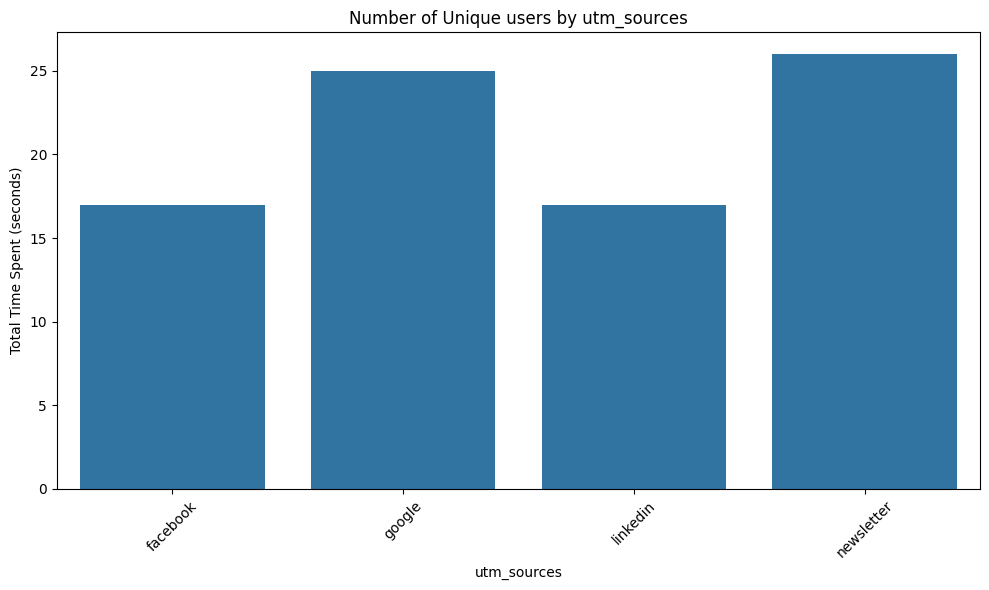

In [86]:

plt.figure(figsize=(10, 6))
sns.barplot(x='utm_source', y='user_id', data=unique_user_ids)
plt.xlabel('utm_sources')
plt.ylabel('Total Time Spent (seconds)')
plt.title('Number of Unique users by utm_sources')
plt.xticks(rotation=45)
# plt.grid()
plt.tight_layout()
plt.show()

#### Sql :- 



SELECT utm_source, COUNT(DISTINCT user_id) as unique_user_ids
FROM web_tracking
GROUP BY utm_source;


SELECT utm_source, COUNT(DISTINCT user_id) as unique_user_ids
FROM web_tracking
GROUP BY utm_source;

In [71]:
# # Sql :- 
# SELECT utm_source, COUNT(DISTINCT user_id) as unique_user_ids
# FROM web_tracking
# GROUP BY utm_source;

### Total Time spent by users based on UTM Sources

SELECT utm_source, Sum(time_spent_sec) as total_time_spent
FROM web_tracking
GROUP BY utm_sources

In [70]:
# SELECT utm_source, Sum(time_spent_sec) as total_time_spent
# FROM web_tracking
# GROUP BY utm_sources

In [26]:
web_tracking

,user_id,session_id,timestamp,page,time_spent_sec,utm_source,utm_medium,device_type,Unnamed: 8
0,151,s000,2024-07-03 12:55:00,/pricing,54,newsletter,referral,mobile,NaN
1,192,s001,2024-05-03 14:21:00,/landing,71,linkedin,email,desktop,NaN
2,114,s002,2024-01-03 14:25:00,/contact,143,facebook,cpc,desktop,NaN
3,171,s003,2024-06-03 16:56:00,/contact,293,newsletter,email,desktop,NaN
4,160,s004,2024-01-03 21:41:00,/contact,37,linkedin,organic,tablet,NaN
...,...,...,...,...,...,...,...,...,...
95,184,s095,2024-06-03 03:40:00,/features,170,newsletter,email,desktop,NaN
96,179,s096,2024-03-03 07:48:00,/pricing,125,facebook,organic,desktop,NaN
97,181,s097,2024-01-03 03:04:00,/contact,84,google,organic,mobile,NaN
98,152,s098,2024-05-03 22:14:00,/pricing,122,newsletter,organic,tablet,NaN


In [33]:
import matplotlib.pyplot as plt
# Calculate the total time spent on the website
total_time_spent = web_tracking.groupby('utm_source')['time_spent_sec'].sum().reset_index()
total_time_spent


,utm_source,time_spent_sec
0,facebook,3383
1,google,4192
2,linkedin,3762
3,newsletter,5038


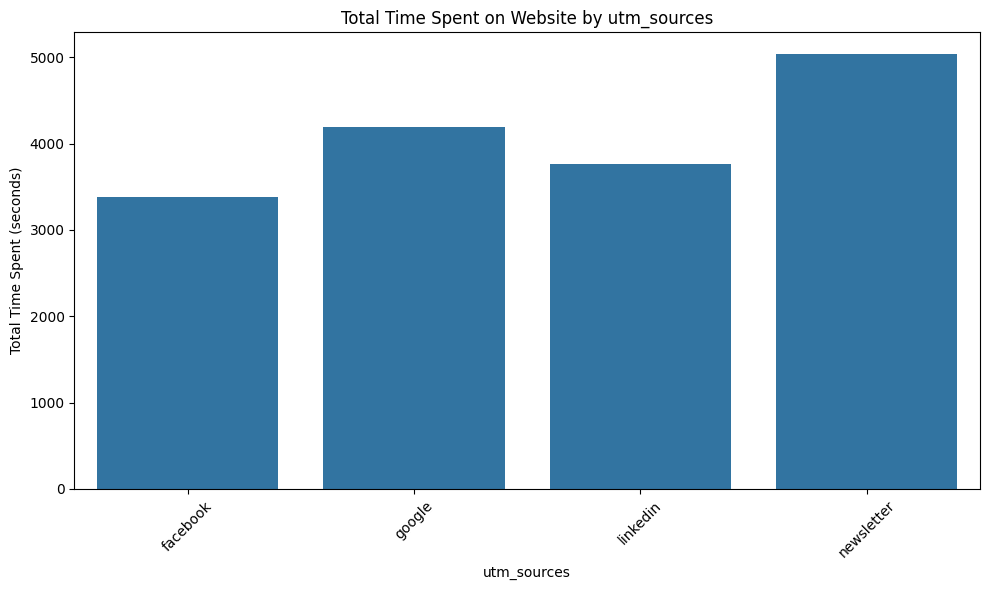

In [36]:

# Create a bar graph

plt.figure(figsize=(10, 6))
sns.barplot(x='utm_source', y='time_spent_sec', data=total_time_spent)
plt.xlabel('utm_sources')
plt.ylabel('Total Time Spent (seconds)')
plt.title('Total Time Spent on Website by utm_sources')
plt.xticks(rotation=45)
# plt.grid()
plt.tight_layout()
plt.show()
# # Format the result as hours, minutes, and seconds
# hours = total_time_spent // 3600
# minutes = (total_time_spent % 3600) // 60
# seconds = total_time_spent % 60

# print("Total time spent on the website: {} hours, {} minutes, {} seconds".format(hours, minutes, seconds))


In [68]:
print("utm_source = \"newsletter\" is the Top performing UTM_SOURCE w.r.t total_time spent")

utm_source = "newsletter" is the Top performing UTM_SOURCE w.r.t total_time spent


In [74]:
print(web_tracking.dtypes)
print(crm_data.dtypes)


user_id                    int64
session_id                object
timestamp         datetime64[ns]
page                      object
time_spent_sec             int64
utm_source                object
utm_medium                object
device_type               object
dtype: object
user_id          int64
lead_status     object
company         object
sign_up_date    object
industry        object
country         object
dtype: object


#### Checking if both the columns dont have any inconsistencies as we will be merging them based on these columns

In [76]:
print(web_tracking['user_id'].nunique())
print(crm_data['user_id'].nunique())
print("Means some data is missing from crm_data")


61
47
Means some data is missing from crm_data


## Top perorming UTM_SOURCE by Conversion rate

SELECT 
  utm_source,
  (COUNT(CASE WHEN crm.lead_status = 'confirmed' THEN 1 END) / COUNT(*)) * 100 AS conversion_rate
FROM web_scraping ws
LEFT JOIN crm_data crm
ON ws.user_id = crm.user_id;


In [48]:

# Merge the CRM and web tracking data on user_id
merged_data = pd.merge(web_tracking, crm_data, on="user_id", how="inner")

# Calculate conversion rate per UTM source
utm_conversion = merged_data.groupby('utm_source').agg(
    total_users=('user_id', 'nunique'),
    converted_users=('lead_status', lambda x: (x == 'converted').sum())
).reset_index()

# Add conversion rate column
utm_conversion['conversion_rate'] = (utm_conversion['converted_users'] / utm_conversion['total_users']) * 100

# Identify the top-performing UTM source based on conversion rate
top_utm_source = utm_conversion.sort_values(by='conversion_rate', ascending=False).iloc[0]


In [49]:
print("\nTop Performing UTM Source:")
top_utm_source


Top Performing UTM Source:


utm_source            google
total_users               19
converted_users           15
conversion_rate    78.947368
Name: 1, dtype: object

In [50]:

# Display results
print("Conversion Rates for All UTM Sources:")
utm_conversion

Conversion Rates for All UTM Sources:


,utm_source,total_users,converted_users,conversion_rate
0,facebook,14,11,78.571429
1,google,19,15,78.947368
2,linkedin,14,11,78.571429
3,newsletter,20,12,60.000000


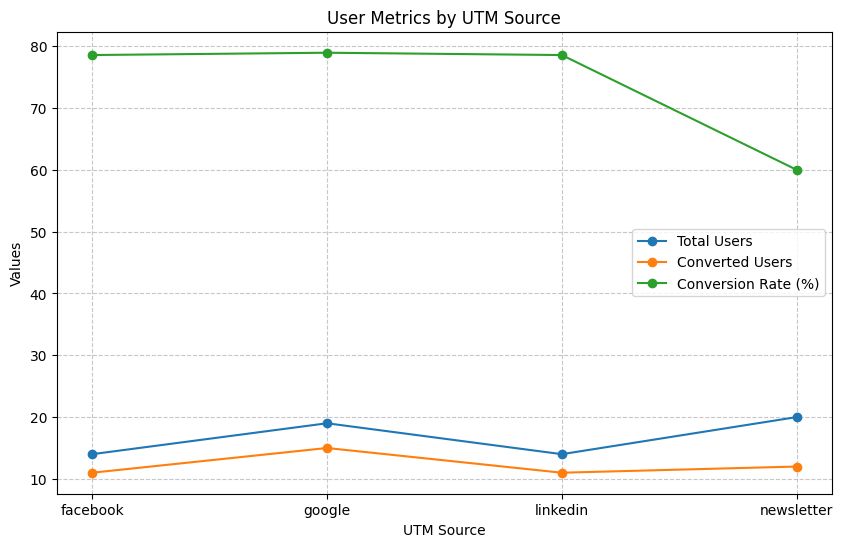

In [84]:
# Plotting
plt.figure(figsize=(10, 6))

# Line plots
plt.plot(utm_conversion["utm_source"], utm_conversion["total_users"], label="Total Users", marker="o")
plt.plot(utm_conversion["utm_source"], utm_conversion["converted_users"], label="Converted Users", marker="o")
plt.plot(utm_conversion["utm_source"], utm_conversion["conversion_rate"], label="Conversion Rate (%)", marker="o")

# Adding labels and title
plt.title("User Metrics by UTM Source")
plt.xlabel("UTM Source")
plt.ylabel("Values")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [46]:
crm_data.head()

,user_id,lead_status,company,sign_up_date,industry,country
0,137,converted,company_0,09-03-2024,healthcare,us
1,163,converted,company_1,01-03-2024,finance,uk
2,103,prospect,company_2,02-03-2024,healthcare,france
3,163,lost,company_3,01-03-2024,saas,us
4,171,lost,company_4,07-03-2024,healthcare,germany


In [47]:
web_tracking.head()

,user_id,session_id,timestamp,page,time_spent_sec,utm_source,utm_medium,device_type,Unnamed: 8
0,151,s000,2024-07-03 12:55:00,/pricing,54,newsletter,referral,mobile,NaN
1,192,s001,2024-05-03 14:21:00,/landing,71,linkedin,email,desktop,NaN
2,114,s002,2024-01-03 14:25:00,/contact,143,facebook,cpc,desktop,NaN
3,171,s003,2024-06-03 16:56:00,/contact,293,newsletter,email,desktop,NaN
4,160,s004,2024-01-03 21:41:00,/contact,37,linkedin,organic,tablet,NaN


In [68]:
web_tracking['time_spent_sec'].max()

np.int64(295)

In [72]:
# Adjusting the labels to match the bins
time_bins = [0, 50, 100, 200, 300]
time_labels = ['0-50', '50-100', '100-200', '200-300']

# Recreating the time_bin column
web_tracking['time_bin'] = pd.cut(web_tracking['time_spent_sec'], bins=time_bins, labels=time_labels)


C:\Users\GuptaSub\AppData\Local\Temp\ipykernel_29180\3900731794.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_counts = web_tracking.groupby('time_bin').size()


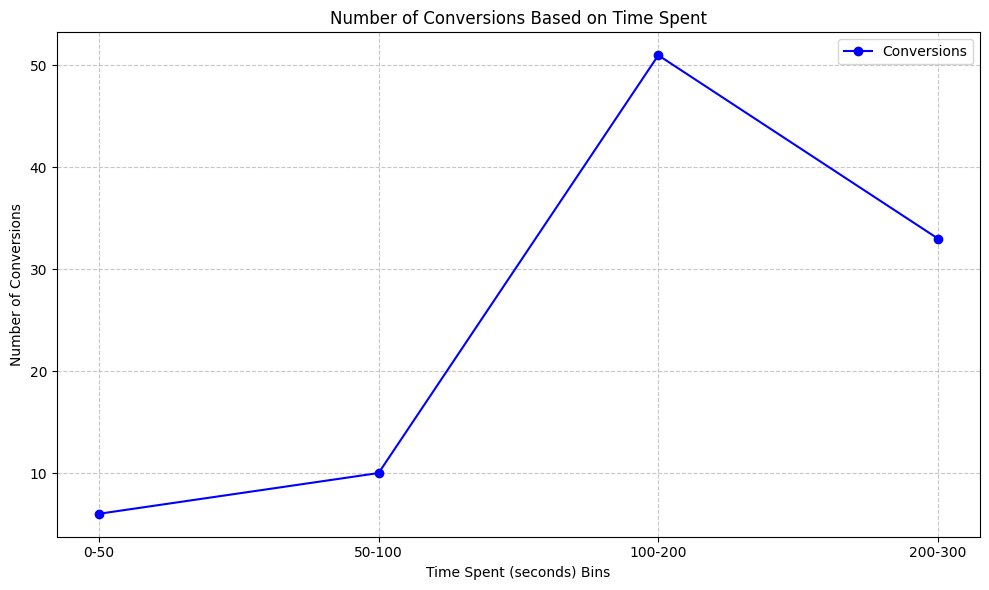

array([ 6, 10, 51, 33])

In [73]:

# Counting the number of conversions in each bin
conversion_counts = web_tracking.groupby('time_bin').size()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(conversion_counts.index.astype(str), conversion_counts.values, marker='o', color='blue', label='Conversions')

# Customizing the chart
plt.xlabel('Time Spent (seconds) Bins')
plt.ylabel('Number of Conversions')
plt.title('Number of Conversions Based on Time Spent')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

conversion_counts.values


## 6. Insights and Recommendations
#### After performing the analysis:

#### Google has the highest conversion rate at 48.39%, making it the most effective campaign.

#### Newsletter drives the highest number of unique users and total time spent.

#### Optimization Opportunities:

#### Improve engagement on Facebook and LinkedIn to boost conversion rates.

#### Allocate more resources to Google campaigns to maximize ROI.

#### Predictive Analysis 